# Imports

In [27]:
import os
import numpy as np
import imageio
import cv2
#import split-folders

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
print (f"Tensorflow Version: {tf.__version__}")
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.applications.vgg19 import preprocess_input as vgg19_preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import SGD, Adam

from tensorflow.keras.preprocessing.image import ImageDataGenerator

Tensorflow Version: 2.3.1


In [2]:
data_dir = os.path.join('./')
# Define train, valid and test directories
train_dir = os.path.join(data_dir, 'train')
#valid_dir = os.path.join(data_dir, 'val')
test_dir = os.path.join(data_dir, 'test')

In [3]:
os.listdir(train_dir)

['ADI', 'MUC', 'BACK', 'LYM', 'NORM', 'DEB', 'MUS', 'TUM', 'STR']

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   shear_range=0.4,
                                   width_shift_range=0.25,
                                   height_shift_range=0.25,
                                   rotation_range=45,
                                   fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# Train ImageDataGenerator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 64,
                                                    target_size = (224,224),
                                                    class_mode = 'categorical',
                                                    shuffle=True,
                                                    seed=42,
                                                    color_mode='rgb')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                batch_size=1,
                                                target_size=(224,224),
                                                class_mode='categorical',
                                                shuffle=False,
                                                seed=42,
                                                color_mode='rgb')

Found 79994 images belonging to 9 classes.
Found 10011 images belonging to 9 classes.


In [6]:
class_labels = train_generator.class_indices
print(class_labels)


{'ADI': 0, 'BACK': 1, 'DEB': 2, 'LYM': 3, 'MUC': 4, 'MUS': 5, 'NORM': 6, 'STR': 7, 'TUM': 8}


# Model

In [7]:
weights_path = "./vgg19_model_finetuned.h5"

In [8]:
def define_compile_model(pretrained_weights):
    
    # Construct VGG19 model without the classifer and weights trained on imagenet data
    feature_extractor = VGG19(input_shape=(224, 224, 3),
                              include_top = False)
    
    x = feature_extractor.output
    flat = Flatten()(x)
    fc_1 = Dense(1024, activation='relu')(flat)
    do_1 = Dropout(0.2)(fc_1)
    fc_2 = Dense(512, activation='relu')(do_1)
    do_2 = Dropout(0.3)(fc_2)
    output = Dense(9, activation= 'softmax')(do_2)

    model = Model(feature_extractor.inputs, output)
    # Compile model
    model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.0004), metrics=["accuracy"])
    print("Compiled Model")
    
    model.load_weights(pretrained_weights)
    print("Loaded Finetuned Weights")
    return model

In [9]:
model = define_compile_model(weights_path)

Compiled Model
Loaded Finetuned Weights


In [28]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

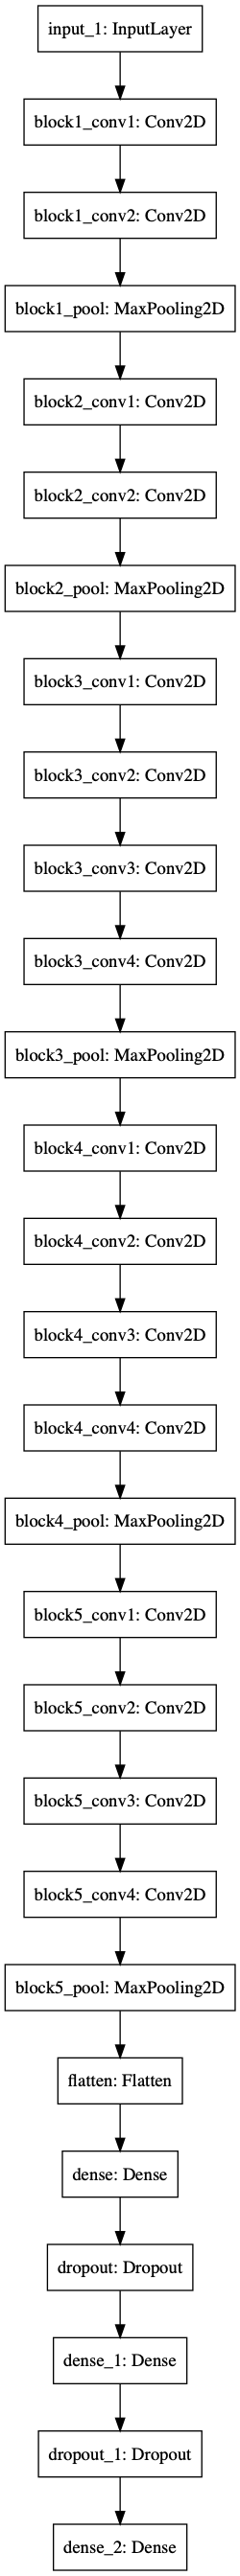

In [12]:
tf.keras.utils.plot_model(model)

In [10]:
base = "./train"
folder_paths = [os.path.join(base, dir_) for dir_ in os.listdir(base)]
sample_images = [os.path.join(folder_name, fname) for folder_name in folder_paths for fname in os.listdir(folder_name)[:2]]
sample_images

['./train/ADI/ADI-MFPELKDK.tif',
 './train/ADI/ADI-AAQPSAIS.tif',
 './train/MUC/MUC-LQWNQVRL.tif',
 './train/MUC/MUC-TPKRILVS.tif',
 './train/BACK/BACK-NLGDIVVF.tif',
 './train/BACK/BACK-ADNCIVKR.tif',
 './train/LYM/LYM-CVKFQDPT.tif',
 './train/LYM/LYM-SERQRSVM.tif',
 './train/NORM/NORM-KFWSEIDW.tif',
 './train/NORM/NORM-YDAIYMVG.tif',
 './train/DEB/DEB-GEAERHTN.tif',
 './train/DEB/DEB-ILYMVELS.tif',
 './train/MUS/MUS-RQFVGMMF.tif',
 './train/MUS/MUS-LLWVFEDI.tif',
 './train/TUM/TUM-EPDPHQIC.tif',
 './train/TUM/TUM-CPMTSWSH.tif',
 './train/STR/STR-CFYWCNHE.tif',
 './train/STR/STR-WRGPECVS.tif']

In [11]:
# img = mpimg.imread(sample_images[-3])
# img_array = image.img_to_array(img)
# plt.imshow(img_array.astype('uint8'))

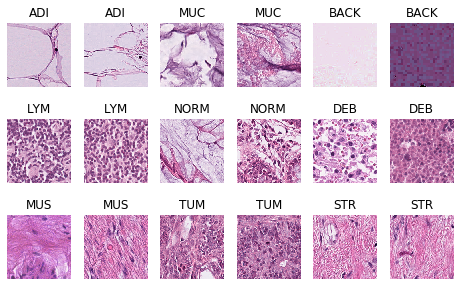

In [11]:
fig = plt.figure(figsize=(8,5))
nrows=3
ncols=6
for num, image in enumerate(sample_images):
    fig.add_subplot(nrows, ncols, num+1)
    image = mpimg.imread(image)
    plt.imshow(image)
    plt.axis("off")
    title = sample_images[num].split('/')[-2]
    plt.title(title)

# Saliency

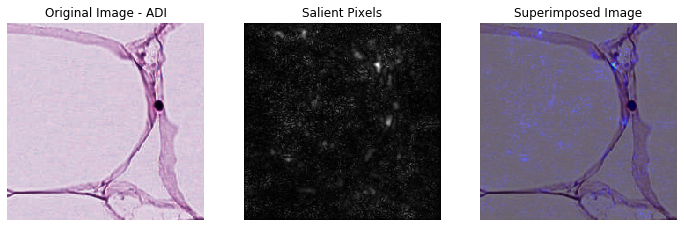

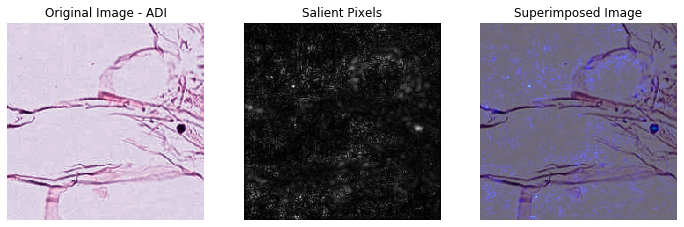

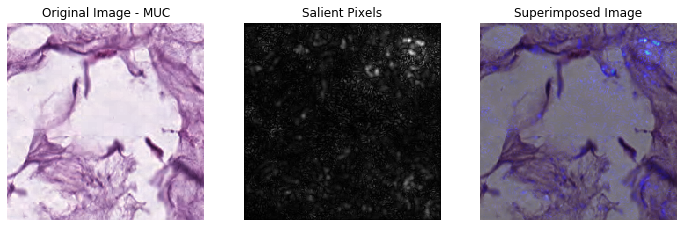

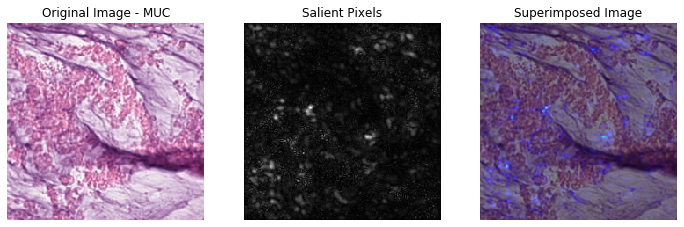

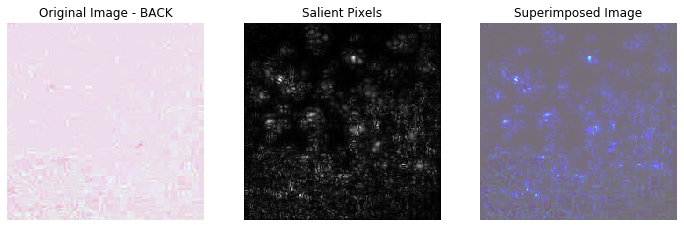

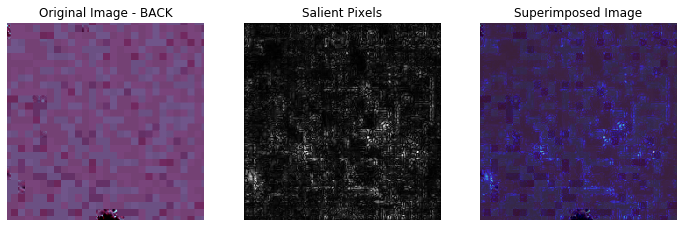

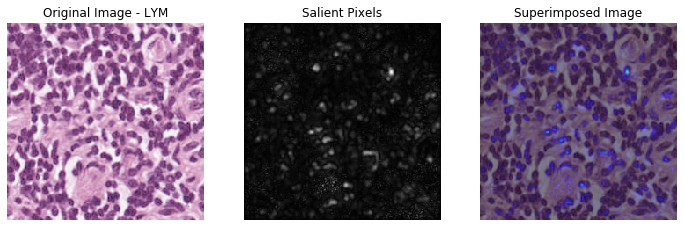

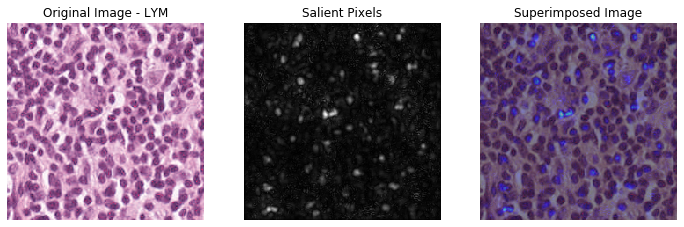

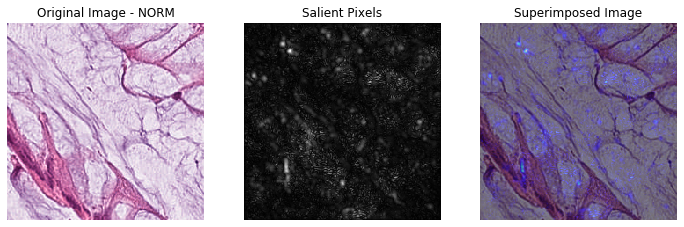

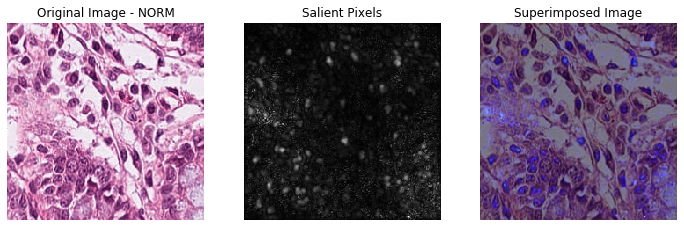

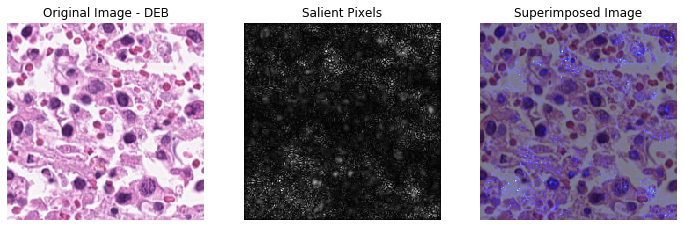

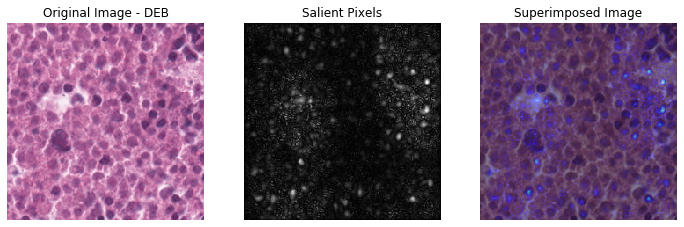

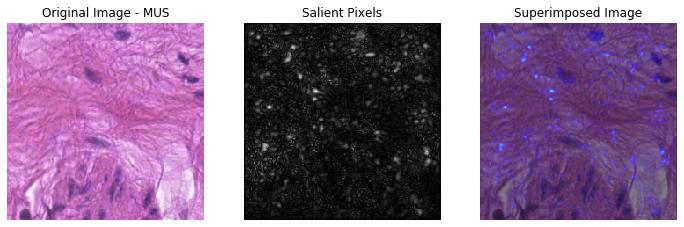

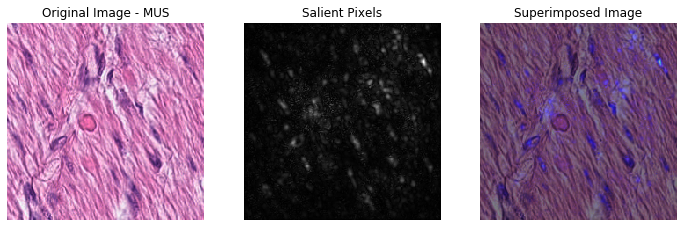

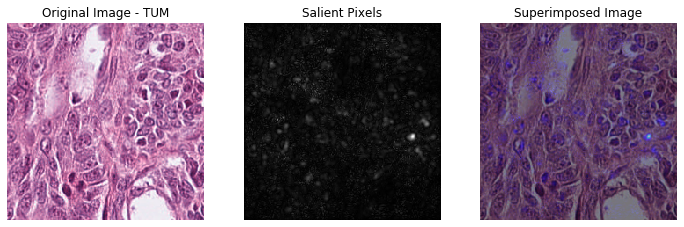

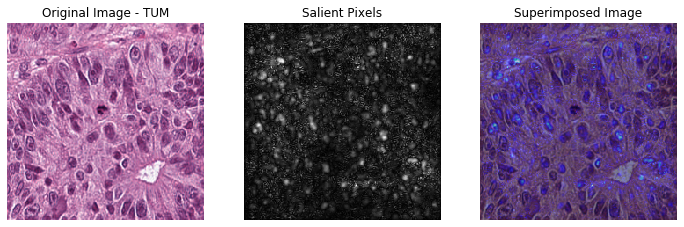

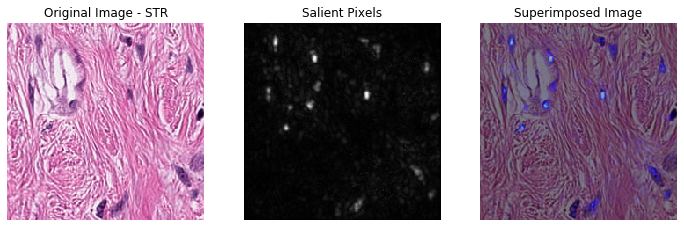

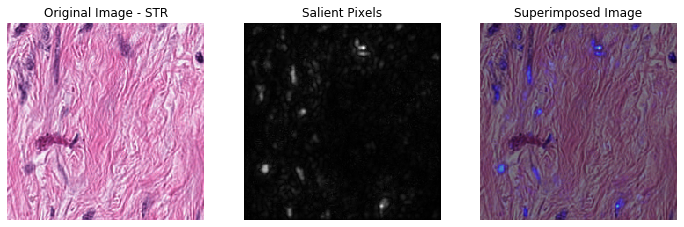

In [22]:
for index, image in enumerate(sample_images):
    # read, format RGB, resize, normalize and exapnd_dims
    img = cv2.imread(sample_images[index])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))/255.0
    images = np.expand_dims(img, axis=0)

    # Compute Gradients
    num_classes = 9
    # class index, 
    label = sample_images[index].split('/')[-2]a
    class_index = class_labels[label]
    
    # convert to one-hot to match softmax activation in the model definition
    expected_output = tf.one_hot([class_index]*images.shape[0], num_classes)
    
    # compute gradients
    with tf.GradientTape() as tape:
        # cast image to float
        inputs = tf.cast(images, tf.float32)
        # watch the input pixels
        tape.watch(inputs) 
        # predictions
        predictions = model(inputs)
        # loss
        loss = tf.keras.losses.categorical_crossentropy(
        expected_output, predictions
        )
        
        # gradients
        gradients = tape.gradient(loss, inputs)
        # reduce the RGB image to grayscale
        grayscale_tensor = tf.reduce_sum(tf.abs(gradients), axis=-1)
        
        
        # normalize the pixel values to be in the range [0, 255].
        # the max value in the grayscale tensor will be pushed to 255.
        # the min value will be pushed to 0.
        normalized_tensor = tf.cast(
        255
        * (grayscale_tensor - tf.reduce_min(grayscale_tensor))
        / (tf.reduce_max(grayscale_tensor) - tf.reduce_min(grayscale_tensor)),
        tf.uint8,
        )

        # remove the channel dimension to make the tensor a 2d tensor
        normalized_tensor = tf.squeeze(normalized_tensor)
        
        gradient_color = cv2.applyColorMap(normalized_tensor.numpy(), cv2.COLORMAP_HOT)
        gradient_color = gradient_color / 255.0
        super_imposed = cv2.addWeighted(img, 0.5, gradient_color, 0.5, 0.0)

        
        
        #Plot figures
        nrows = 2
        ncols = 3
        fig = plt.figure(figsize=(12,12))
        fig.add_subplot(nrows, ncols, 1)
        img = mpimg.imread(sample_images[index])
        plt.imshow(img)
        label = sample_images[index].split('/')[-2]
        plt.title(f"Original Image - {label}")
        plt.axis("off")
        
        fig.add_subplot(nrows, ncols, 2)
        plt.imshow(normalized_tensor, cmap='gray')
        plt.title('Salient Pixels')
        plt.axis("off")
        
        fig.add_subplot(nrows, ncols, 3)
        plt.imshow(super_imposed)
        plt.title('Superimposed Image')
        plt.axis("off")